# Proyecto prediccion por medio de imagenes utilizando deep learning
En el marco de la realizacion del curso preidccion por medio de imagenes utilizando deep learning , se realiza un proyecto de clasificacion, dicho proyecto recoge imagenes adquiridas en la empresa que trabajo actualmente conocida como INTECOL SAS , el objetivo del proyecto es clasificar latas buenas y latas malas, Intecol realizo una arquitectura compuesta por iluminacion , 4 camaras adecuadas y un sistema expulsor, las imagenes adquiridas se pueden observar a continuacion:
### Imagen buena
<img src="images/_OK.png" alt="" style="height:200px"></img>

### Imagen Mala
<img src="images/NOTOK.png" alt="" style="height:200px"></img>



Actualmente el sistema utiliza un algoritmo de vision artificial que funciona con operaciones basicas de imagenes, tales como threshold , filtros , adquisicion de caracteristicas tales como area , angulo , en donde se analiza cada una de las lineas que se ven en las latas , y  con condicionales se logra clasificar la lata como buena/mala .

La idea del proyecto es utilizar dichos algoritmos para generar un dataset de mas de 20000 imagenes para llevar a cabo la
clasificacion de las imagenes mediante uso de algoritmos de deep learning.

In [3]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd 
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import math
%matplotlib inline

In [4]:
base_dir = 'dataset/all_split_2'
test_dir =  os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'Val')

# Directory with our training pictures
train_OK_dir = os.path.join(train_dir, 'OK')
train_NOT_OK_dir = os.path.join(train_dir, 'NOT_OK')

# Directory with our validation pictures
validation_OK_dir = os.path.join(validation_dir, 'OK')
validation_NOT_OK_dir = os.path.join(validation_dir, 'NOT_OK')
train_OK_fnames = os.listdir( train_OK_dir )
train_NOT_OK_fnames = os.listdir( train_NOT_OK_dir )

# print(train_cat_fnames[:10])
# print(train_dog_fnames[:10])



FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dataset/all_split_2\\train\\OK'

'dataset/all_split_2\\train\\OK'

In [2]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 20 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_OK_pix = [os.path.join(train_OK_dir, fname) 
                for fname in train_OK_fnames[ pic_index-8:pic_index] 
               ]

next_NOT_OK_pix = [os.path.join(train_NOT_OK_dir, fname) 
                for fname in train_NOT_OK_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_OK_pix+next_NOT_OK_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
#   print(img.shape)  
  plt.imshow(img, 'gray')

NameError: name 'plt' is not defined

# se utiliza la libreria ImageDataGenerator para cargar el dataset  y aplicar normalizacion a las imagenes (y si se requiere data augmentation)

In [6]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(
      rescale=1/255,
#       rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       fill_mode='nearest',
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images

        ### En esta linea de codigo se cambia el tamaño de la imagen

        target_size=(512, 512),  # All images will be resized 

        ####

        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
# Flow training images in batches of 128 using train_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,  # This is the source directory for training images

        ##Tamaño de imagen del validation dataset


        target_size=(512, 512),  # All images will be resized 
        ###


        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 20113 images belonging to 2 classes.
Found 2236 images belonging to 2 classes.


### Se genera un modelo propio en donde se modificaron todos los hyperparametros para lograr el mejor resultado posible

In [9]:
classifier = Sequential()
classifier.add(Convolution2D(32,(5,5),input_shape=(512, 512,3),activation= "relu",padding="same")) ##
# classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (4,4)))
classifier.add(Convolution2D(64,(3,3),activation='relu',padding="same"))
classifier.add(MaxPooling2D(2))
classifier.add(Convolution2D(256,(3,3),activation='relu',padding="same"))
classifier.add(MaxPooling2D(2))
classifier.add(Convolution2D(256,(3,3),activation='relu',padding="same"))
classifier.add(MaxPooling2D(4))
classifier.add(Convolution2D(512,(3,3),activation='relu',padding="same"))
classifier.add(MaxPooling2D(2))
classifier.add(Convolution2D(512,(3,3),activation='relu',padding="same"))
# classifier.add(MaxPooling2D(2))

classifier.add(Flatten())
classifier.add(Dense(units=2048,activation='relu'))
classifier.add(Dense(units=1024,activation='relu'))
# classifier.add(Dropout(0.5))
classifier.add(Dense(units=512,activation='relu'))
classifier.add(Dense(units=256,activation='relu'))
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=64,activation='relu'))
classifier.add(Dense(units=32,activation='relu'))
classifier.add(Dense(units=16,activation='relu'))
classifier.add(Dense(units=8,activation='relu'))
# classifier.add(Dropout(0.5))
classifier.add(Dense(units=1,activation='sigmoid'))

classifier.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics= ['accuracy'])


In [10]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       5

### Realizamos el entrenamiento utilizando callbacks para guardar el mejor modelo , para modificar el learning rate, y para detener el entrenamiento si ha dejado de entrenar el modelo

In [17]:
filepath="3_weights-improvement-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', mode="max", factor = 0.7, 
     patience = 5, verbose = 1, min_delta =0.00001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, mode='auto')

callbacks = [reduce_lr,checkpoint,early_stop]

batch_size = 64

history = classifier.fit(train_generator,
                                   steps_per_epoch = math.ceil(train_generator.samples//batch_size),
                              validation_data=validation_generator,  
                                   validation_steps=math.ceil(validation_generator.samples//batch_size),
                              epochs=50,workers=-1, 
                            use_multiprocessing=True, shuffle=True, callbacks=callbacks
                              )

Epoch 1/50
62/62 [==============================] - 487s 8s/step - loss: 0.6312 - accuracy: 0.7329 - val_loss: 0.5137 - val_accuracy: 0.7404

Epoch 00001: val_accuracy improved from -inf to 0.74038, saving model to 3_weights-improvement-01-0.74.h5
Epoch 2/50
62/62 [==============================] - 422s 7s/step - loss: 0.4467 - accuracy: 0.7167 - val_loss: 0.5032 - val_accuracy: 0.6947

Epoch 00002: val_accuracy did not improve from 0.74038
Epoch 3/50
62/62 [==============================] - 420s 7s/step - loss: 0.4327 - accuracy: 0.7764 - val_loss: 0.4970 - val_accuracy: 0.8220

Epoch 00003: val_accuracy improved from 0.74038 to 0.82195, saving model to 3_weights-improvement-03-0.82.h5
Epoch 4/50
62/62 [==============================] - 422s 7s/step - loss: 0.3996 - accuracy: 0.8196 - val_loss: 0.3570 - val_accuracy: 0.8558

Epoch 00004: val_accuracy improved from 0.82195 to 0.85577, saving model to 3_weights-improvement-04-0.86.h5
Epoch 5/50
62/62 [==============================] - 4

### Despues de realizar el entrenamiento y guardar los modelos se logra una precision de 98% 

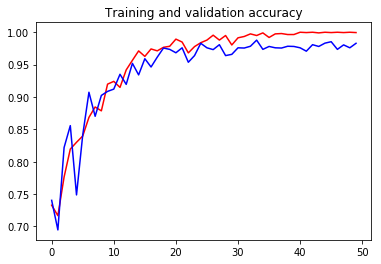

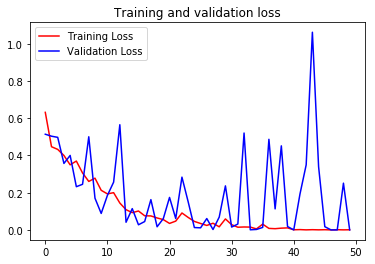

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
from keras.models import load_model
model = load_model('saved_models/4_weights-improvement-48-0.97.h5')

OSError: SavedModel file does not exist at: saved_models/10-improvement-epoch-50.h5/{saved_model.pbtxt|saved_model.pb}

In [16]:
test_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
test_generator = test_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images

        ##Tamaño de imagen del validation dataset


        target_size=(512, 512),  # All images will be resized 
        ###


        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 20113 images belonging to 2 classes.


In [17]:
model.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics= ['accuracy'])

In [18]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 512, 512, 32)      2432      
_________________________________________________________________
batch_normalization_25 (Batc (None, 512, 512, 32)      128       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
batch_normalization_26 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 64, 64, 256)      

### Se carga el modelo y se evalua 

In [ ]:
with tf.device('/cpu:0'):
    batch_size= 32
    y = model.predict_generator(test_generator,steps= math.ceil(test_generator.samples//batch_size),workers=8)

c:\users\david\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
with tf.device('/cpu:0'):

    scoreSeg = model.evaluate_generator(test_generator,862)
    print("Accuracy = ",scoreSeg[1])

In [30]:
loss,acc = model.evaluate(test_generator)
print("restored model , accuracy in the test set :  ",acc)

27/27 [==============================] - 45s 2s/step
restored model , accuracy in the test set :   0.9791183471679688


27/26 [==============================] - 46s 2s/step
number of errors = 346/862
[[ 67 174]
 [172 449]]


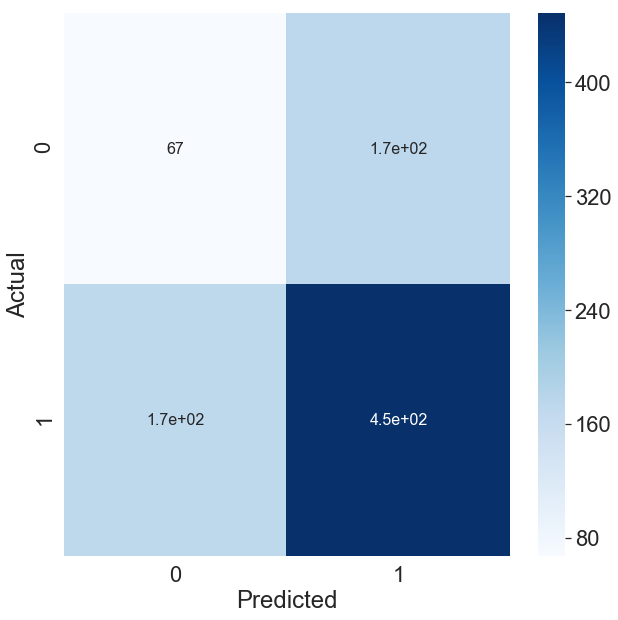

In [32]:
# Get the ground truth from generator
ground_truth = test_generator.classes
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.around(predictions) 
predicted_classes = predicted_classes.astype(int)
predicted_classes = predicted_classes[:,0]
errors = np.where(predicted_classes != ground_truth)[0]
print("number of errors = {}/{}".format(len(errors),test_generator.samples))
cm = confusion_matrix(ground_truth, predicted_classes)
data = confusion_matrix(ground_truth, predicted_classes)
print(cm)
df_cm = pd.DataFrame(data, columns=np.unique(ground_truth), index = np.unique(ground_truth))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.set(font_scale=2)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [33]:
from sklearn.metrics import classification_report
print(classification_report(ground_truth, predicted_classes))

              precision    recall  f1-score   support

           0       0.28      0.28      0.28       241
           1       0.72      0.72      0.72       621

    accuracy                           0.60       862
   macro avg       0.50      0.50      0.50       862
weighted avg       0.60      0.60      0.60       862



[[1.]]
OK


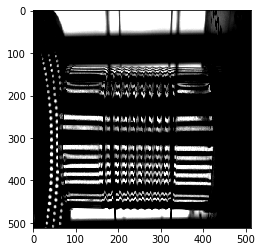

In [9]:
from keras.preprocessing import image


path='dataset/cam2/OK/imagen_2020_12_28_1348_0533.png' 
img=image.load_img(path, target_size=(512, 512))
plt.imshow(img)  
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = model.predict(images, batch_size=10)
  
print(classes)
if classes[0]>0.5:
    print( "OK")
    
else:
    print( " NOT OK")

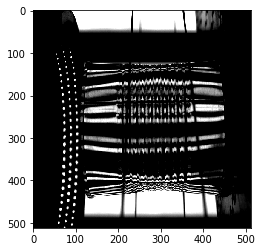

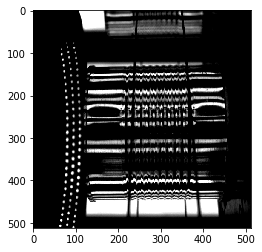

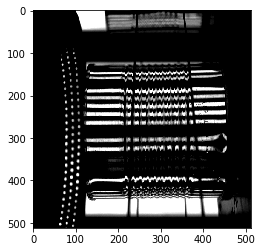

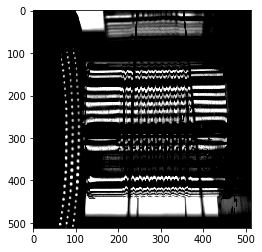

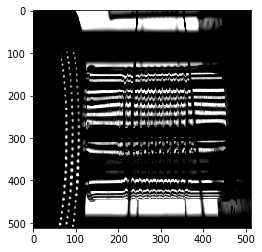

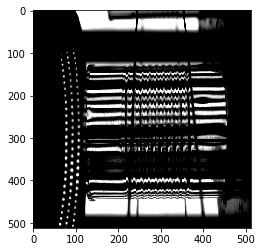

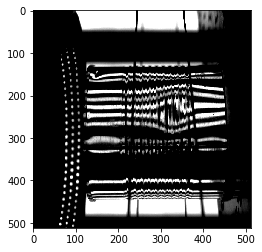

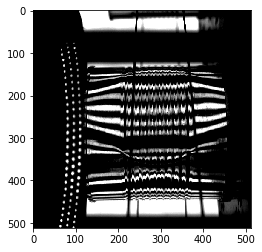

In [11]:
import PIL
from keras.preprocessing import image
import glob
%matplotlib inline

for i,filename in enumerate(glob.glob("dataset/cam1_splitted/test/OK/*.png"), 1):
    img=image.load_img(filename, target_size=(512, 512))
#     plt.figure()
   
    
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
  
    classes = model.predict(images, batch_size=10)
  
    if classes[0]<0.5:
#         plt.axis('off')
#         plt.grid(b=None)
#         plt.figure(figsize=((10,10)))
# #         plt.subplot(300, 4, i+1)
        plt.imshow(img)
        plt.show()
    
    

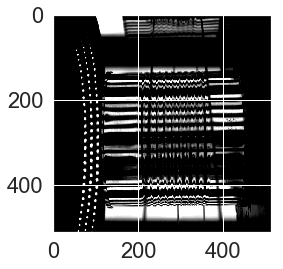

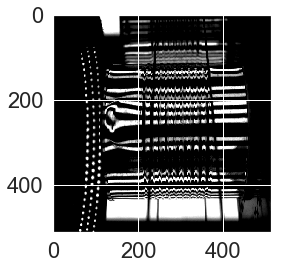

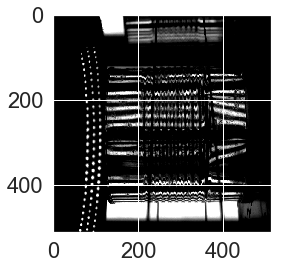

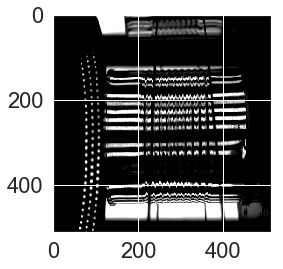

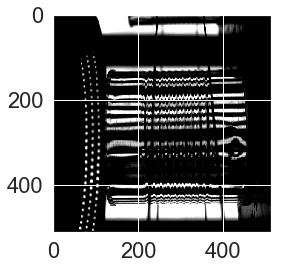

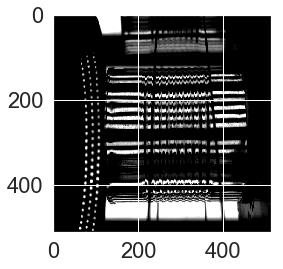

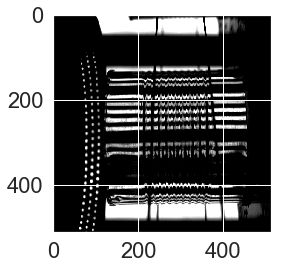

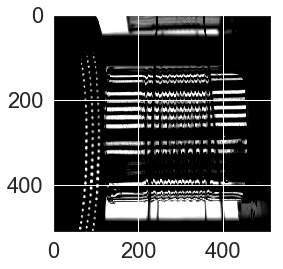

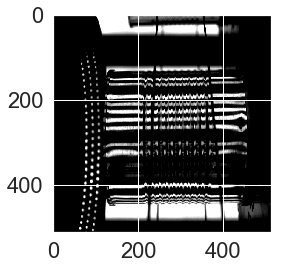

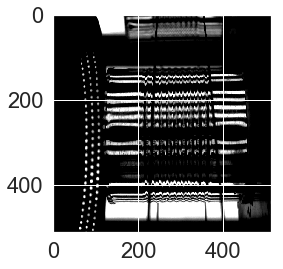

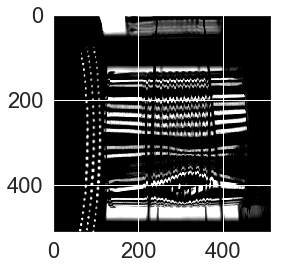

In [151]:
for i,filename in enumerate(glob.glob("dataset/cam1_splitted/test/NOT_OK/*.png")):
    img=image.load_img(filename, target_size=(512, 512))
#     plt.figure()
   
#     print(i) 
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
  
    classes = model.predict(images, batch_size=10)
#     print(classes[0])
    if classes[0]>0.5:
#         plt.axis('off')
#         plt.grid(b=None)
#         plt.figure(figsize=((10,10)))
# #         plt.subplot(300, 4, i+1)
        plt.imshow(img)
        plt.show()
    

# Conclusiones

### el dataset es satisfactorio para realizar una clasificacion entre latas buenas y malas , ademas el modelo utilizado logra una precision bastante buena , sin embargo al cargar nuevamente el modelo y evaluarlo inclusive en el train set, hay algo extraño , ya que se obtienen valores de precision bastante bajos , diferentes a los que se obtuvieron cuando se entreno la imagen , Seria bueno revisar que es lo que esta pasando.

### Otra alternativa que se puede hacer es utilizar modelos y arquitecturas que son famosas en el mundo academico tales como RESNET, inception , densenet ... entre otros. seguramente dichos modelos funcionan de mejor manera y pueden ser mas rapidos para lograr una implementacion de este modelo en planta
